In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as tt
from torchvision.transforms import Compose, Normalize, ToTensor
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt
%matplotlib inline
from torch.utils.data import DataLoader
import os
from torchvision.utils import save_image
from IPython.display import Image

In [2]:
dataset = MNIST(root='data', train=True, download=False,
                transform = Compose([ToTensor(), Normalize(mean=(0.5,), std=(0.5,))]))

In [3]:
def denorm(img):
    out = (img+1)/2
    return out.clamp(0,1)

In [4]:
batch_size=100

train_dl = DataLoader(dataset, batch_size, shuffle=True)

In [5]:
img_size = 784
latent_size = 64

D = nn.Sequential(nn.Linear(img_size, 256),
                  nn.LeakyReLU(0.2),
                  nn.Linear(256, 256),
                  nn.LeakyReLU(0.2),
                  nn.Linear(256, 1),
                  nn.Sigmoid())

G = nn.Sequential(nn.Linear(latent_size, 256),
                  nn.ReLU(),
                  nn.Linear(256, 256),
                  nn.ReLU(),
                  nn.Linear(256, 784),
                  nn.Tanh())

In [6]:
loss_fn = nn.BCELoss()
d_opt = torch.optim.Adam(D.parameters(), lr = 0.0002)
g_opt = torch.optim.Adam(G.parameters(), lr = 0.0002)

In [7]:
def reset_grads():
    d_opt.zero_grad()
    g_opt.zero_grad()

In [8]:
def train_d(images):
    #Labels
    real_labels = torch.ones(batch_size, 1)
    fake_labels = torch.zeros(batch_size, 1)
    
    #Disc Loss
    outputs = D(images)
    d_loss = loss_fn(outputs, real_labels)
    
    #Gen Loss
    fake_images_lat = torch.randn(batch_size, latent_size)
    fake_images = G(fake_images_lat)
    outputs = D(fake_images)
    g_loss = loss_fn(outputs, fake_labels)
    
    #Learning
    loss = d_loss + g_loss
    reset_grads()
    loss.backward()
    d_opt.step()
    
    return loss

In [9]:
def train_g():
    images_lat = torch.randn(batch_size, latent_size)
    images = G(images_lat)
    labels = torch.ones(batch_size, 1)
    g_loss = loss_fn(D(images), labels)
    
    reset_grads()
    g_loss.backward()
    g_opt.step()
    
    return g_loss

saving fake_image_0.png


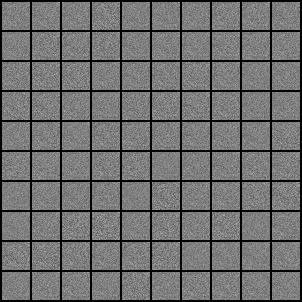

In [10]:
sample_lat = torch.randn(batch_size, 64)

def save_fake_image(index):
    fake_images = G(sample_lat)
    fake_images = fake_images.reshape(fake_images.size(0), 1, 28, 28)
    fake_name = f'fake_image_{index}.png'
    print(f'saving {fake_name}')
    save_image(denorm(fake_images), f'sample/{fake_name}', nrow=10)
    
save_fake_image(0)
Image(f'sample/fake_image_0.png')

In [11]:
def train(epochs):
    for epoch in range(epochs):
        for i, (img, _) in enumerate(train_dl):
            img = img.reshape(batch_size, -1)
            
            d_loss = train_d(img)
            g_loss = train_g()
            
            if (i+1)%200 == 0:
                print(f'Epoch [{epoch}/{epochs}]: D_Loss: {d_loss}  G_Loss: {g_loss}')
#         print(f'Epoch [{epoch}/{epochs}]')
        save_fake_image(epoch+1)

In [12]:
train(50)

Epoch [0/50]: D_Loss: 0.04503084346652031  G_Loss: 4.039346694946289
Epoch [0/50]: D_Loss: 0.06655328720808029  G_Loss: 4.982236385345459
Epoch [0/50]: D_Loss: 0.060277752578258514  G_Loss: 4.657076358795166
saving fake_image_1.png
Epoch [1/50]: D_Loss: 0.08734264969825745  G_Loss: 5.195924758911133
Epoch [1/50]: D_Loss: 0.06192002445459366  G_Loss: 4.928325653076172
Epoch [1/50]: D_Loss: 0.8127731084823608  G_Loss: 5.430293083190918
saving fake_image_2.png
Epoch [2/50]: D_Loss: 0.16132906079292297  G_Loss: 3.867295503616333
Epoch [2/50]: D_Loss: 0.41923847794532776  G_Loss: 2.682126998901367
Epoch [2/50]: D_Loss: 0.4828614890575409  G_Loss: 5.508056640625
saving fake_image_3.png
Epoch [3/50]: D_Loss: 0.38426047563552856  G_Loss: 3.3581225872039795
Epoch [3/50]: D_Loss: 1.1883467435836792  G_Loss: 2.7208456993103027
Epoch [3/50]: D_Loss: 0.9510299563407898  G_Loss: 2.2074966430664062
saving fake_image_4.png
Epoch [4/50]: D_Loss: 0.4137006103992462  G_Loss: 3.082040309906006
Epoch [4/50

Epoch [35/50]: D_Loss: 0.5165123343467712  G_Loss: 3.5597150325775146
Epoch [35/50]: D_Loss: 0.4181496500968933  G_Loss: 2.858258008956909
saving fake_image_36.png
Epoch [36/50]: D_Loss: 0.5165786743164062  G_Loss: 3.542914628982544
Epoch [36/50]: D_Loss: 0.44739973545074463  G_Loss: 3.2460269927978516
Epoch [36/50]: D_Loss: 0.3157111406326294  G_Loss: 3.4737255573272705
saving fake_image_37.png
Epoch [37/50]: D_Loss: 0.35773053765296936  G_Loss: 3.185140371322632
Epoch [37/50]: D_Loss: 0.27199700474739075  G_Loss: 3.3077893257141113
Epoch [37/50]: D_Loss: 0.4355931282043457  G_Loss: 3.858814001083374
saving fake_image_38.png
Epoch [38/50]: D_Loss: 0.2422841638326645  G_Loss: 2.8136491775512695
Epoch [38/50]: D_Loss: 0.4200068414211273  G_Loss: 3.9088830947875977
Epoch [38/50]: D_Loss: 0.37775152921676636  G_Loss: 3.9636592864990234
saving fake_image_39.png
Epoch [39/50]: D_Loss: 0.43720543384552  G_Loss: 3.619920015335083
Epoch [39/50]: D_Loss: 0.46532607078552246  G_Loss: 3.075420618

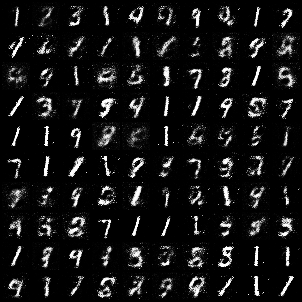

In [14]:
z = torch.randn(100, 64)
img = G(z)
img = img.reshape(img.size(0),1,28,28)
save_image(denorm(img), 'sample/SAMPLE.png', nrow=10)
Image('sample/SAMPLE.png')